# Mount to google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [2]:
!ls -la

total 20
drwxr-xr-x 1 root root 4096 Sep  5 21:58 .
drwxr-xr-x 1 root root 4096 Sep  5 21:55 ..
drwxr-xr-x 4 root root 4096 Sep  1 13:20 .config
drwx------ 6 root root 4096 Sep  5 21:58 drive
drwxr-xr-x 1 root root 4096 Sep  1 13:21 sample_data


In [3]:
%cd "/content/drive/Othercomputers/isaac_mac_pro/diffusion_model_course/05_week5"

!pwd; ls -la

/content/drive/Othercomputers/isaac_mac_pro/diffusion_model_course/05_week5
/content/drive/Othercomputers/isaac_mac_pro/diffusion_model_course/05_week5
total 1498
-rw------- 1 root root 1502336 Sep  5 20:01 astronaut_rides_horse.png
drwx------ 2 root root    4096 Sep  5 06:25 paper
-rw------- 1 root root   26251 Sep  5 21:58 stable_diffusion.ipynb


# Import libaries and setup models from Huggingfaces

In [4]:
!pip install diffusers transformers accelerate scipy safetensors


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.1/989.1 kB 10.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 101.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.4 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.20.2-py3-none-any.whl size=1342633 sha256=e619864605625c202f2f27597e18fcbd955285d036b765ac7a30ec5fea185e12
  Stored in directory: /root/.cache/pip/wheels/dc/8b/d9/34f7a1936109e05e9bba0cc2241a6f8cd89e25959dc7aae942
Successfully built diffusers


In [5]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:

prompt = "a complex computational simulation mesh"
image = pipe(prompt, num_inference_steps = 20).images[0]

image.save("astronaut_rides_horse.png")

  0%|          | 0/20 [00:00<?, ?it/s]

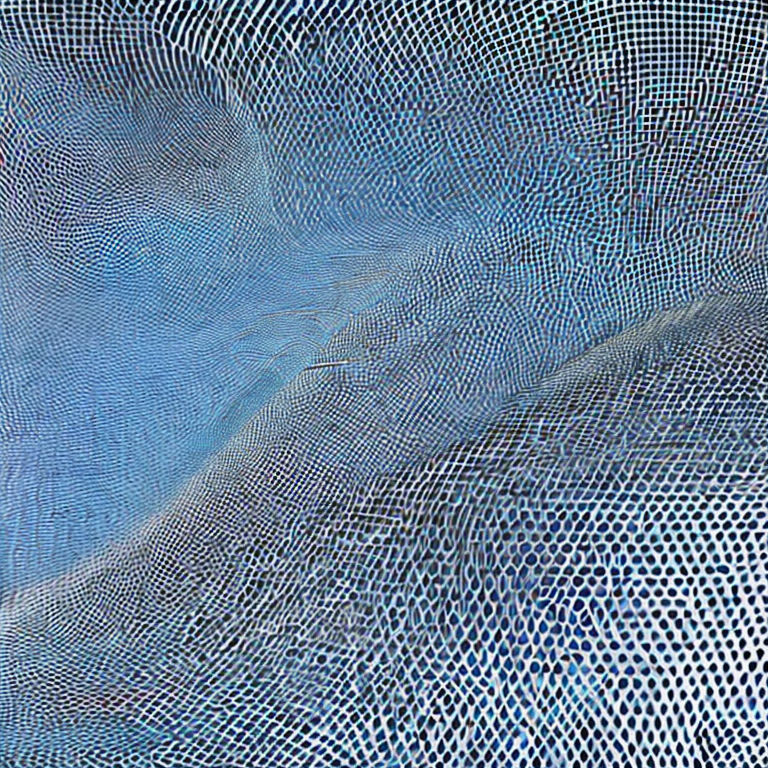

In [ ]:
image

In [7]:
print(pipe.__call__.__doc__)


        The call function to the pipeline for generation.

        Args:
            prompt (`str` or `List[str]`, *optional*):
                The prompt or prompts to guide image generation. If not defined, you need to pass `prompt_embeds`.
            height (`int`, *optional*, defaults to `self.unet.config.sample_size * self.vae_scale_factor`):
                The height in pixels of the generated image.
            width (`int`, *optional*, defaults to `self.unet.config.sample_size * self.vae_scale_factor`):
                The width in pixels of the generated image.
            num_inference_steps (`int`, *optional*, defaults to 50):
                The number of denoising steps. More denoising steps usually lead to a higher quality image at the
                expense of slower inference.
            guidance_scale (`float`, *optional*, defaults to 7.5):
                A higher guidance scale value encourages the model to generate images closely linked to the text
            

In [9]:

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt, height = 1024, width = 1024).images[0]

image.save("astronaut_rides_horse.png")

  0%|          | 0/50 [00:00<?, ?it/s]